<a href="https://colab.research.google.com/github/MAALEVAISHNAVI/Machine-Learning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sns

In [93]:
dataset=pd.read_csv("/content/sample_data/Logistic_Iris.csv")
dataset

,Sepal Length,Sepal Width,Petal Length,Peatal Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [94]:
x=dataset.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [95]:
y=dataset.iloc[:,4].values
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [96]:
xtrain, xtest, ytrain, ytest= train_test_split(x,y,test_size=0.25,random_state=0)

In [97]:
xtrain

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.5, 1.6, 0.6],
       [5.4, 3.7, 1.5, 0.2],
       [5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3

In [98]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [99]:
xtrain

array([[ 1.54399532e-02, -1.19254753e-01,  2.25126850e-01,
         3.56381749e-01],
       [-9.98450310e-02, -1.04039491e+00,  1.13559562e-01,
        -2.86480506e-02],
       [ 1.05300481e+00, -1.19254753e-01,  9.50314227e-01,
         1.12644135e+00],
       [-1.36797986e+00,  3.41315328e-01, -1.39259884e+00,
        -1.31208072e+00],
       [ 1.16828980e+00,  1.11030287e-01,  7.27179649e-01,
         1.38312788e+00],
       [-1.02212490e+00,  1.03217045e+00, -1.22524790e+00,
        -7.98707650e-01],
       [-5.60984968e-01,  1.49274053e+00, -1.28103155e+00,
        -1.31208072e+00],
       [-1.02212490e+00, -2.42210516e+00, -1.65358660e-01,
        -2.85334584e-01],
       [ 7.07149859e-01, -1.19254753e-01,  9.50314227e-01,
         7.41411549e-01],
       [ 9.37719827e-01,  5.71600368e-01,  1.06188152e+00,
         1.63981441e+00],
       [ 1.30724937e-01, -1.96153508e+00,  6.71396005e-01,
         3.56381749e-01],
       [ 9.37719827e-01, -1.27067995e+00,  1.11766516e+00,
      

In [104]:
dtree_gini=DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
dtree_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [105]:
y_pred1=dtree_gini.predict(xtest)
print("Predicted values:")
y_pred1

Predicted values:


array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [106]:
accgini=accuracy_score(ytest,y_pred1)*100
print("\n\nAccuracy using Gini index:", accgini)



Accuracy using Gini index: 89.47368421052632


In [107]:
cm=confusion_matrix(ytest,y_pred1)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


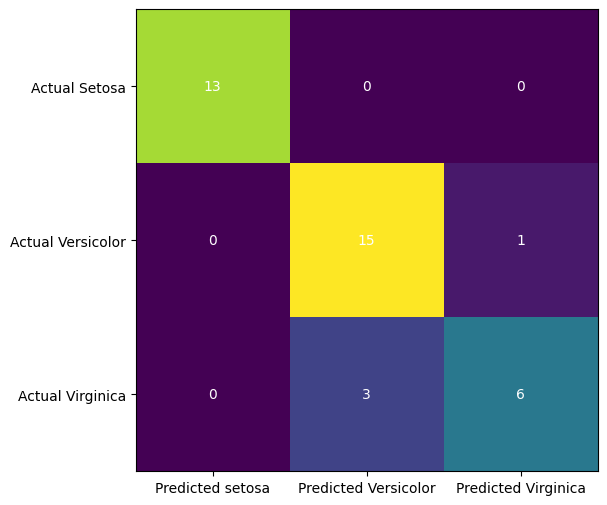

In [108]:
fig, ax=plt.subplots(figsize=(6,6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=("Predicted setosa", "Predicted Versicolor", "Predicted Virginica"))
ax.yaxis.set(ticks=(0,1,2), ticklabels=("Actual Setosa", "Actual Versicolor","Actual Virginica"))
ax.set_ylim(2.5,-0.5)
for i in range(3):
  for j in range(3):
    ax.text(j,i, cm[i,j], ha="center", va="center", color="white")
plt.show()

[Text(0.375, 0.875, 'x[2] <= -0.807\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 0.644\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.25, 0.375, 'x[3] <= 0.421\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.75, 0.375, 'x[3] <= 0.806\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.625, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [0, 1, 8]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

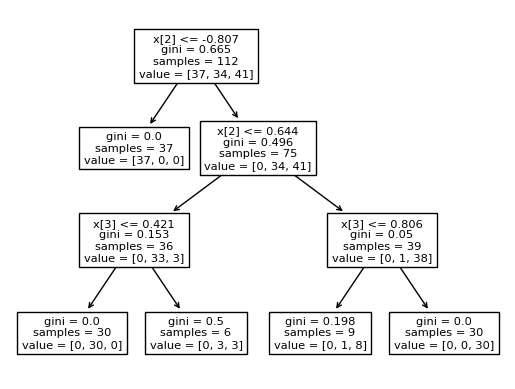

In [109]:
tree.plot_tree(dtree_gini)

In [110]:
#using Entropy
dtree_entropy=DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
dtree_entropy.fit(xtrain,ytrain)
y_pred2=dtree_entropy.predict(xtest)

In [111]:
acc_entropy=accuracy_score(ytest,y_pred1)*100
print("\n\nAccuracy using Entropy index:", acc_entropy)



Accuracy using Entropy index: 89.47368421052632


In [112]:
cm=confusion_matrix(ytest,y_pred1)
print("Confusion matrix: \n",cm)

Confusion matrix: 
 [[13  0  0]
 [ 0 15  1]
 [ 0  3  6]]


[Text(0.375, 0.875, 'x[2] <= -0.807\nentropy = 1.581\nsamples = 112\nvalue = [37, 34, 41]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[2] <= 0.644\nentropy = 0.994\nsamples = 75\nvalue = [0, 34, 41]'),
 Text(0.25, 0.375, 'x[3] <= 0.421\nentropy = 0.414\nsamples = 36\nvalue = [0, 33, 3]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 6\nvalue = [0, 3, 3]'),
 Text(0.75, 0.375, 'x[3] <= 0.806\nentropy = 0.172\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(0.625, 0.125, 'entropy = 0.503\nsamples = 9\nvalue = [0, 1, 8]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

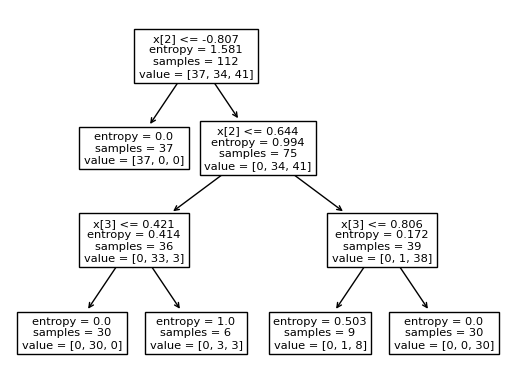

In [113]:
tree.plot_tree(dtree_entropy)